In [295]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math
import glob
import itertools
from scipy.fft import fft, fftfreq

In [274]:
pupil_path = r'C:\Users\river\Downloads\491_PJ2\Pupil Data\Pupil Data'
pupil_files = glob.glob(os.path.join(pupil_path , "*.csv"))
pupil_df = pd.concat((pd.read_csv(f) for f in pupil_files), ignore_index=True)
pupil_df.sort_values(by=['Time'])
mean = pupil_df.groupby(['Time'], as_index=False).mean()

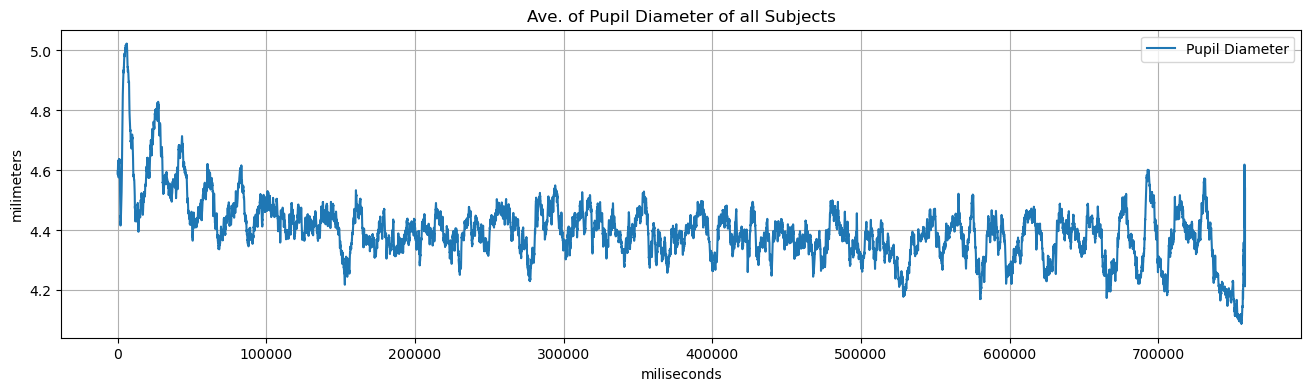

In [276]:
ind = mean.set_index('Time')
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(mean['Time'], mean['Pupil Diameter'], label='Pupil Diameter')
plt.xlabel("miliseconds")
plt.ylabel("milimeters")
plt.title("Ave. of Pupil Diameter of all Subjects")
plt.legend()
ax.grid()
plt.show()

In [289]:
for i in range(1,53):
    subject = pd.read_csv(f'Pupil Data\Pupil Data\subject_{i}_behave.csv')
    ind = subject.set_index('Time')
    behave = pd.read_csv(f'Behavioral Data\Behavioral Data\subject_{i}_behave.csv')
    
    f = plt.figure(figsize=(16,4))
    
    plt.plot(subject['Time'], subject['Pupil Diameter'], label='Pupil Diameter')
    
    x = behave['Time'].to_numpy()
    y = np.empty(len(x))
    y.fill(subject['Pupil Diameter'].mean())
    markerline, stemlines, baseline = plt.stem(x, y, markerfmt='o', label='Stimulus Onset')
    plt.setp(stemlines, 'color', plt.getp(markerline,'color'))
    plt.setp(stemlines, 'linestyle', 'dotted')
    
    x1 = (behave['Time'] + behave['RT']).to_numpy()
    y1 = np.empty(len(x))
    y1.fill(subject['Pupil Diameter'].mean())
    markerline, stemlines, baseline = plt.stem(x1, y1, markerfmt='o', label='Reaction Time')
    plt.setp(stemlines, 'color', plt.getp(markerline,'color'))
    plt.setp(stemlines, 'linestyle', 'dotted')
    
    plt.xlabel("miliseconds")
    plt.ylabel("milimeters")
    plt.title(f"Pupil Diameter of Subject {i}")
    plot_margin = 0.25
    plt.axis([0,800000,min(subject['Pupil Diameter'])-0.25, max(subject['Pupil Diameter'])+0.25])
    plt.legend(loc="lower left")
    plt.savefig(f'graphs/pd_subj/subject{i}.png')
    plt.close()


In [319]:
for i in range(1,53):
    subject = pd.read_csv(f'Pupil Data\Pupil Data\subject_{i}_behave.csv')
    ind = subject.set_index('Time')
    behave = pd.read_csv(f'Behavioral Data\Behavioral Data\subject_{i}_behave.csv')
    
    N = len(ind['Pupil Diameter'])
    sampling_timing = 4/1000
    
    yf = fft(subject['Pupil Diameter'].to_numpy())
    xf = fftfreq(N, sampling_timing)[:N//2]

    plt.figure(figsize=(12,4))
    plt.ylabel('Input**2/Hz')
    plt.xlabel('Hz')
    plt.title(f'Subject {i} Freq. Domain')
    plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    plt.grid()
    plt.axis([0,0.1,0, max(2.0/N * np.abs(yf[0:N//2]))+0.5])
    plt.savefig(f'graphs/fft/subject{i}.png')
    plt.close()

In [288]:
for i in range(1,53):
    subject = pd.read_csv(f'Pupil Data\Pupil Data\subject_{i}_behave.csv')
    ind = subject.set_index('Time')
    behave = pd.read_csv(f'Behavioral Data\Behavioral Data\subject_{i}_behave.csv')
    
    f = plt.figure(figsize=(16,4))
    
    plt.plot(subject['Time'], subject['Pupil Diameter'], label='Pupil Diameter')
    
    x = behave['Time'].to_numpy()
    y = np.empty(len(x))
    y.fill(subject['Pupil Diameter'].mean())
    markerline, stemlines, baseline = plt.stem(x, y, markerfmt='o', label='Stimulus Onset')
    plt.setp(stemlines, 'color', plt.getp(markerline,'color'))
    plt.setp(stemlines, 'linestyle', 'dotted')
    
    x1 = (behave['Time'] + behave['RT']).to_numpy()
    y1 = np.empty(len(x))
    y1.fill(subject['Pupil Diameter'].mean())
    markerline, stemlines, baseline = plt.stem(x1, y1, markerfmt='o', label='Reaction Time')
    plt.setp(stemlines, 'color', plt.getp(markerline,'color'))
    plt.setp(stemlines, 'linestyle', 'dotted')
    
    plt.xlabel("miliseconds")
    plt.ylabel("milimeters")
    plt.title(f"Pupil Diameter of Subject {i}")
    plot_margin = 0.25
    plt.axis([0,100000,min(subject['Pupil Diameter'])-0.25, max(subject['Pupil Diameter'])+0.25])
    plt.legend(loc="lower left")
    plt.savefig(f'graphs/pd_subj_zoomed/subject{i}.png')
    plt.close()
    


In [286]:
for i in range(1,53):
    subject = pd.read_csv(f'Pupil Data\Pupil Data\subject_{i}_behave.csv')
    ind = subject.set_index('Time')
    behave = pd.read_csv(f'Behavioral Data\Behavioral Data\subject_{i}_behave.csv')
    start = behave['Time']
    end = behave['Time'] + behave['RT']
    
    for j in range(40):
        baseline = int(4*round(start[j]/4))
        if not math.isnan(end[j]):
            endline = int(4*round(end[j]/4))
        else:
            endline = int(4*round((start[j]+8000)/4))
        mean = ind.loc[baseline:endline].sub(ind.loc[baseline])

        plt.figure(figsize=(16,4))
        plt.plot(mean, label='Pupil Diameter')
        plt.xlabel("miliseconds")
        plt.ylabel("milimeters")
        plt.title(f"Pupil Diameter of Subject {i}: Trial {j+1}")
        plt.legend(loc="upper left")
        plt.grid()
        
        newpath = f'C:/Users/river/Downloads/491_PJ2/graphs/trial_graphs/subject{i}/'
        if not os.path.exists(newpath):
            os.makedirs(newpath)
        plt.savefig(f'graphs/trial_graphs/subject{i}/trial_{j+1}')
        plt.close()